In [ ]:
import os                  # dealing with directories
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/Research/Train_test_val'
IMG_SIZE = 64

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load and preprocess your dataset
train_dir = '/content/drive/MyDrive/Research/Train_test_val/train'
val_dir = '/content/drive/MyDrive/Research/Train_test_val/val'
test_dir= '/content/drive/MyDrive/Research/Train_test_val/test'
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)


Found 10833 images belonging to 2 classes.
Found 1375 images belonging to 4 classes.
Found 1356 images belonging to 2 classes.


In [ ]:
def image_read(TRAIN_DIR):
    training_data = []
    for c in os.listdir(path):
        for img in tqdm(os.listdir(os.path.join(path,c))):
            img_path= os.path.join(path,c,img)
            image=plt.imread(img_path)
            if image is not None:
                training_data.append(np.array(image))
                labels.append(c)
    return training_data, labels

In [ ]:
data, labels=image_read(path)

100%|██████████| 5499/5499 [01:40<00:00, 54.80it/s] 


In [ ]:
labels

['Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 'Fire',
 

In [ ]:
len(data), len(labels)

(10833, 10833)

In [ ]:
data, labels = np.array(data, dtype= 'object'), np.array(labels)

In [ ]:
print("Class names from the dataset {}".format(np.unique(labels)))

Class names from the dataset ['Fire' 'Non-fire']


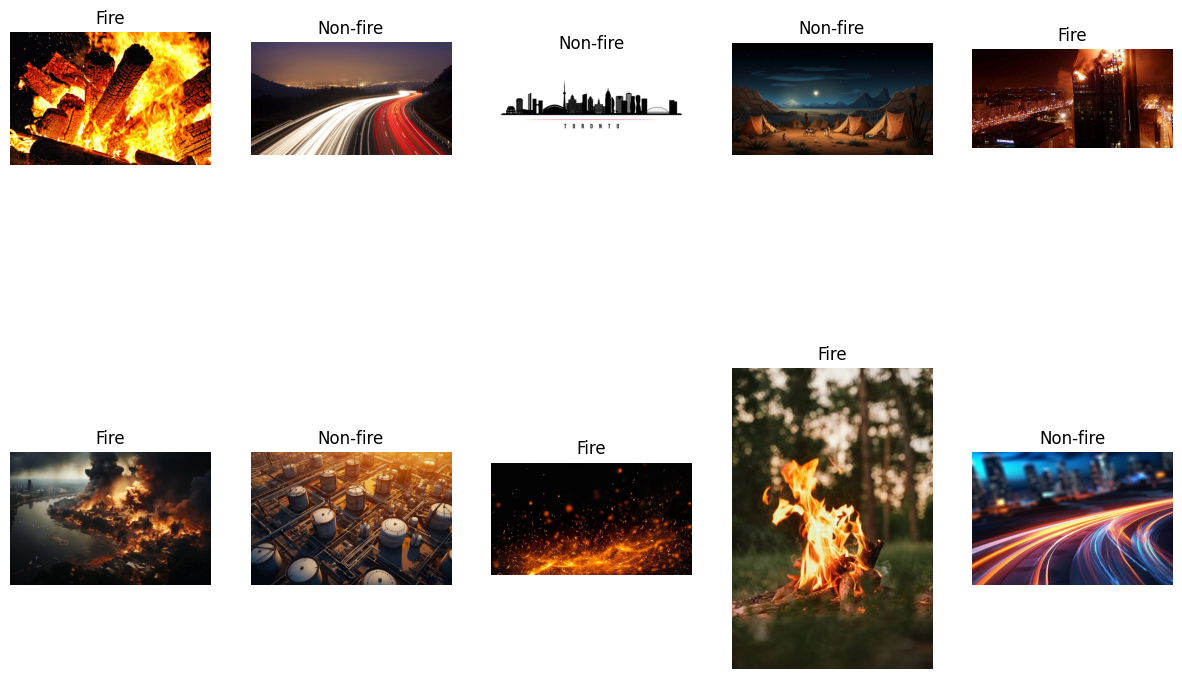

In [ ]:
plot_index=np.random.choice(np.arange(data.shape[0]),10)

plt.figure(figsize=(15, 10))

for i, j in enumerate(data[plot_index], 1):
    plt.subplot(2, int(len(data[plot_index])/2), i)
    plt.axis("off")
    plt.title(labels[plot_index][i-1])
    plt.imshow(j)

In [ ]:
le = LabelEncoder()

In [ ]:
labels_encoded = le.fit_transform(labels)

In [ ]:
labels_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
normalized_data = data / 255

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data,
                                                    labels_encoded,
                                                    test_size=0.3,
                                                    random_state=48)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1506, 256, 256, 3), (646, 256, 256, 3), (1506,), (646,))

CNN

In [ ]:
y_train_onehot = to_categorical(y_train,6)
y_test_onehot = to_categorical(y_test,6)
IMG_SIZE = 64

In [ ]:
def CNN_Simple():
    # Initialize model
    Basic_CNN = tf.keras.Sequential([
    Conv2D(16, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100),
    Activation('relu'),
    Dropout(0.5),
    Dense(100),
    Activation('relu'),
    Dropout(0.5),
    Dense(6),
    Activation('softmax')])
    return Basic_CNN

In [ ]:
model = CNN_Simple()

# Train the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train,y_train_onehot, batch_size=64, epochs=15, shuffle=True)

Epoch 1/15
24/24 [==============================] - 31s 1s/step - loss: 1.5054 - accuracy: 0.4695
Epoch 2/15
24/24 [==============================] - 31s 1s/step - loss: 0.9093 - accuracy: 0.6076
Epoch 3/15
24/24 [==============================] - 30s 1s/step - loss: 0.6144 - accuracy: 0.7928
Epoch 4/15
24/24 [==============================] - 30s 1s/step - loss: 0.4798 - accuracy: 0.8446
Epoch 5/15
24/24 [==============================] - 29s 1s/step - loss: 0.4137 - accuracy: 0.8625
Epoch 6/15
24/24 [==============================] - 28s 1s/step - loss: 0.3722 - accuracy: 0.8725
Epoch 7/15
24/24 [==============================] - 28s 1s/step - loss: 0.3082 - accuracy: 0.9017
Epoch 8/15
24/24 [==============================] - 28s 1s/step - loss: 0.2411 - accuracy: 0.9110
Epoch 9/15
24/24 [==============================] - 28s 1s/step - loss: 0.1914 - accuracy: 0.9223
Epoch 10/15
24/24 [==============================] - 28s 1s/step - loss: 0.1817 - accuracy: 0.9296
Epoch 11/15
24/24 [

In [ ]:
predictions=model.predict(x_test, batch_size=1)

646/646 [==============================] - 8s 11ms/step


In [ ]:
predictions[0].shape

(6,)

In [ ]:
predictions[0][0]

6.7016765e-05

In [ ]:
predicted_class_values = np.apply_along_axis(np.argmax, 1, predictions)

<Axes: >

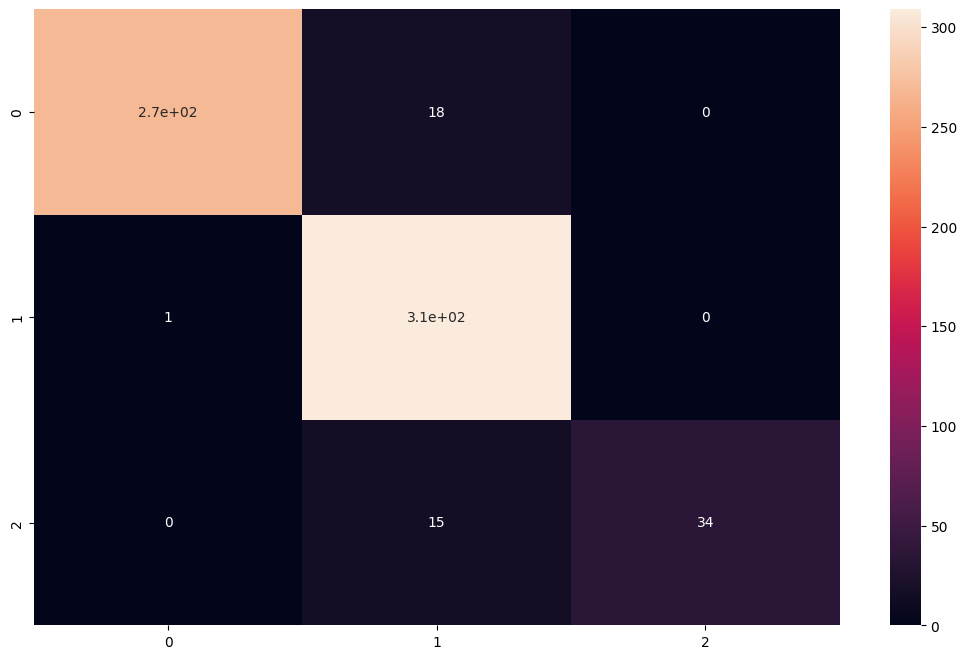

In [ ]:
confusion_matrix(y_test, predicted_class_values)
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, predicted_class_values),annot=True)

In [ ]:
print(classification_report(y_test, predicted_class_values))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       287
           1       0.90      1.00      0.95       310
           2       1.00      0.69      0.82        49

    accuracy                           0.95       646
   macro avg       0.97      0.88      0.91       646
weighted avg       0.95      0.95      0.95       646



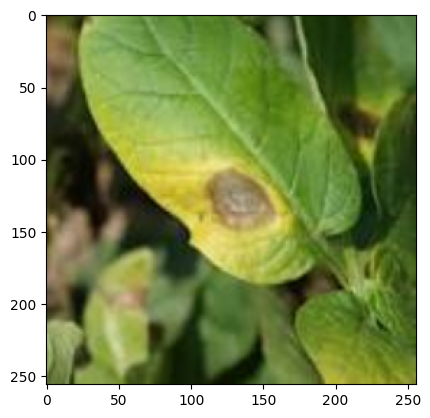

In [ ]:
import cv2
is_mymodel_good = cv2.imread('PlantVillage/download.jpeg')
is_mymodel_good = cv2.resize(is_mymodel_good, (IMG_SIZE,IMG_SIZE))
is_mymodel_good = cv2.cvtColor(is_mymodel_good,cv2.COLOR_BGR2RGB)
is_mymodel_good=is_mymodel_good/255
plt.imshow(is_mymodel_good)

In [ ]:
class_index=model.predict(is_mymodel_good.reshape(1,IMG_SIZE,IMG_SIZE,3),batch_size=1)

1/1 [==============================] - 0s 62ms/step


In [ ]:
class_index[0].argmax()

0

In [ ]:
le.inverse_transform([class_index[0].argmax()])

array(['Potato___Early_blight'], dtype='<U21')

ANN

In [ ]:
def ANN():
    model= tf.keras.Sequential([
        Flatten(),
        Dense(100, activation='relu'),
        Dense(60, activation='relu'),
        Dense(30, activation='relu'),
        Dense(10, activation='softmax')])
    return model

In [ ]:
y_train_onehot = to_categorical(y_train,10)
y_test_onehot = to_categorical(y_test,10)

In [ ]:
# Create an instance of the model
model = ANN()

# Train the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train_onehot, batch_size=5, epochs=15, shuffle=True)

Epoch 1/15
302/302 [==============================] - 65s 211ms/step - loss: 5.4277 - accuracy: 0.6149
Epoch 2/15
302/302 [==============================] - 64s 212ms/step - loss: 2.2900 - accuracy: 0.7045
Epoch 3/15
302/302 [==============================] - 64s 211ms/step - loss: 1.8061 - accuracy: 0.7470
Epoch 4/15
302/302 [==============================] - 64s 212ms/step - loss: 0.9045 - accuracy: 0.7683
Epoch 5/15
302/302 [==============================] - 64s 213ms/step - loss: 0.6578 - accuracy: 0.7888
Epoch 6/15
302/302 [==============================] - 65s 215ms/step - loss: 0.6941 - accuracy: 0.7762
Epoch 7/15
302/302 [==============================] - 65s 216ms/step - loss: 0.4907 - accuracy: 0.8194
Epoch 8/15
302/302 [==============================] - 64s 212ms/step - loss: 0.4555 - accuracy: 0.8499
Epoch 9/15
302/302 [==============================] - 63s 209ms/step - loss: 0.4099 - accuracy: 0.8347
Epoch 10/15
302/302 [==============================] - 63s 209ms/step - l

In [ ]:
predictions = model.predict(x_test, batch_size=50)

13/13 [==============================] - 0s 20ms/step


In [ ]:
predicted_class_values = np.apply_along_axis(np.argmax, 1, predictions)

<Axes: >

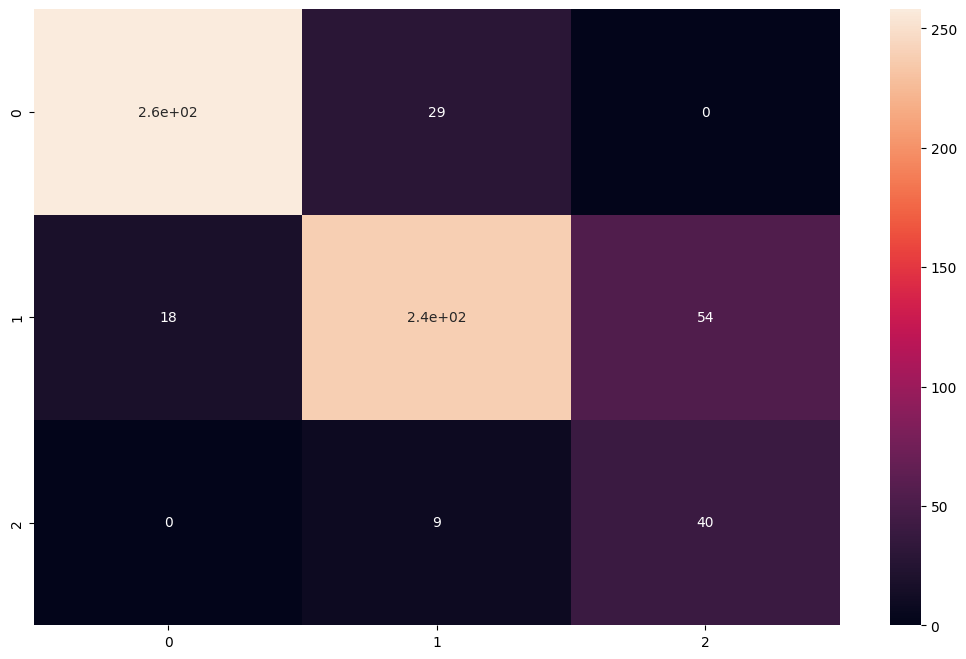

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, predicted_class_values),annot=True)

In [ ]:
print(classification_report(y_test, predicted_class_values))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       287
           1       0.86      0.77      0.81       310
           2       0.43      0.82      0.56        49

    accuracy                           0.83       646
   macro avg       0.74      0.83      0.76       646
weighted avg       0.86      0.83      0.84       646

